In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import scipy.stats
from scipy import stats

In [2]:
df = pd.read_csv("FootballScore.csv")

df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [4]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [5]:
df.shape

(202, 13)

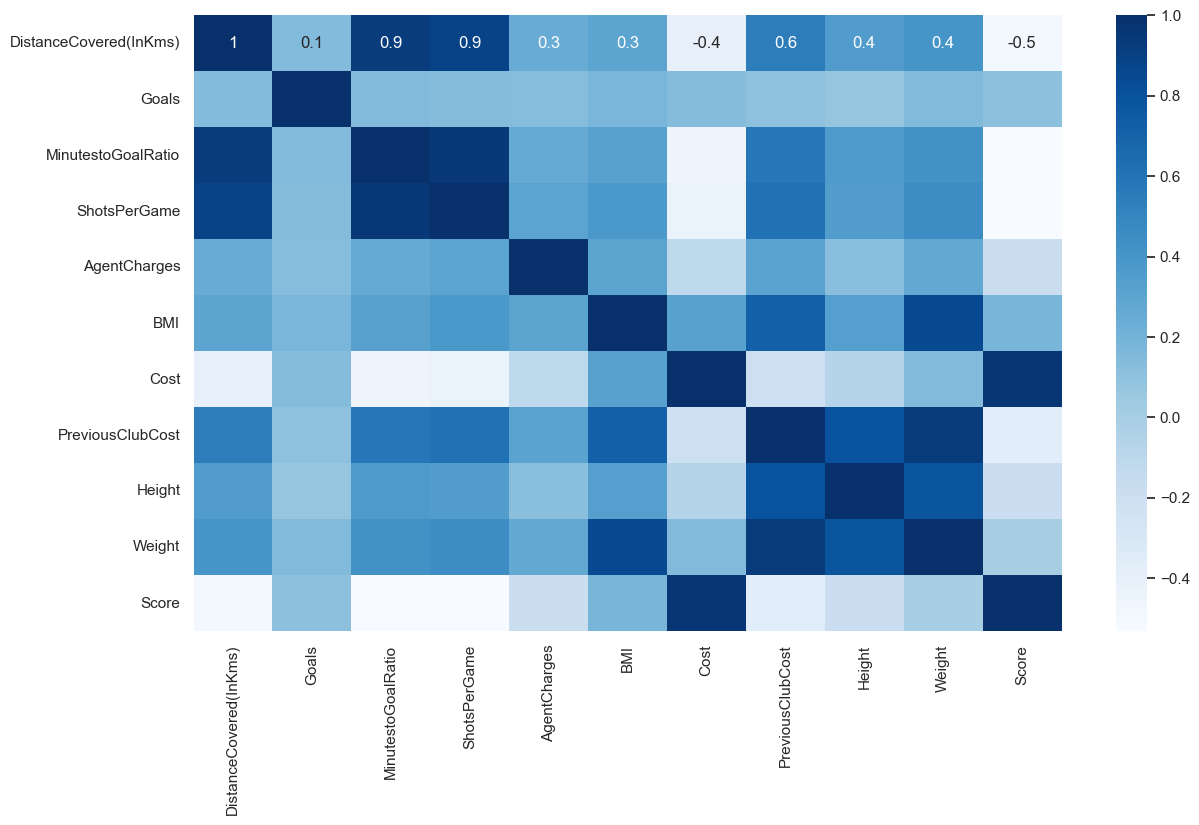

In [6]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.select_dtypes(exclude="object").corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [7]:
df.isna().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

In [8]:
df.nunique()

PlayerName                198
Club                        3
DistanceCovered(InKms)    114
Goals                      71
MinutestoGoalRatio        105
ShotsPerGame               55
AgentCharges              111
BMI                       180
Cost                      176
PreviousClubCost          135
Height                    147
Weight                    164
Score                     180
dtype: int64

In [9]:
df.value_counts()

PlayerName                       Club  DistanceCovered(InKms)  Goals  MinutestoGoalRatio  ShotsPerGame  AgentCharges  BMI    Cost   PreviousClubCost  Height  Weight  Score
Albimona, Mr. Nassef Cassem      CHE   4.84                    8.3    46.3                15.9          39            22.68  43.0   74.00             187.1   79.4    7.06     1
Rice, Master. Arthur             CHE   4.81                    6.2    45.2                15.3          107           22.52  42.7   77.00             192.0   83.0    7.19     1
Pekoniemi, Mr. Edvard            CHE   4.81                    6.8    42.7                15.3          50            26.95  98.5   63.04             171.1   78.9    20.10    1
Pengelly, Mr. Frederick William  LIV   5.13                    4.0    44.1                15.2          87            21.65  33.7   66.00             180.2   70.3    6.56     1
Perkin, Mr. John Henry           LIV   4.82                    6.4    44.3                14.8          35            22

In [10]:
df.select_dtypes(exclude="object").corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


## Finding: The strongest correlating factor is cost.

Let's find the correlatiion it has with scores

Text(0, 0.5, 'cost')

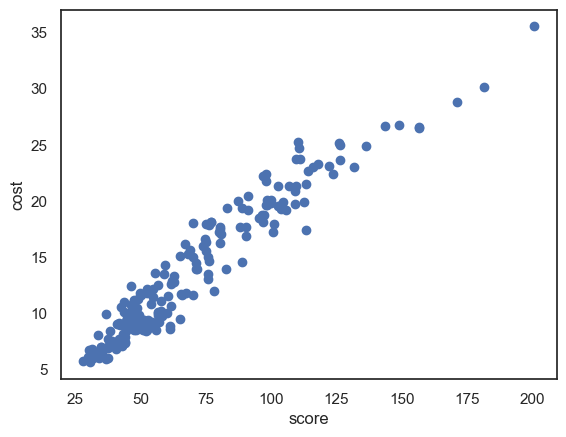

In [11]:
plt.scatter(df["Cost"], df["Score"])
plt.xlabel("score")
plt.ylabel("cost")

In [12]:
# split the data for training and testing

x = df["Cost"]
y = df["Score"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=100)

In [13]:
#statsmodel approach to linear regression

lr = sm.OLS(y_train, x_train).fit()

#printing the parameters
lr.params
lr.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                   3.84e-144
Time:                        12:17:52   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#force intercept term

x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           6.91e-88
Time:                        12:17:52   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## This means if I increase cost by 1 pound,score will increase by 0.18

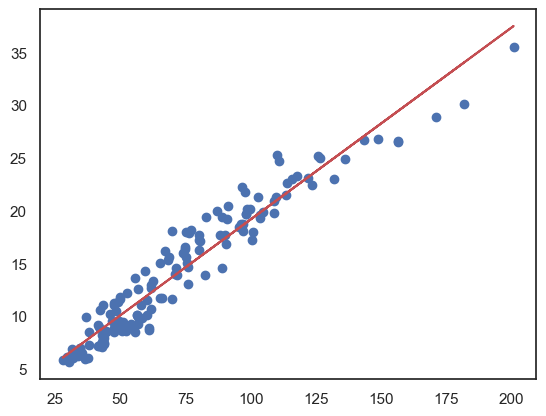

In [15]:
#Extract the B0 and B1

b0 = lr.params.iloc[0]
b1 = lr.params.iloc[1]


#plot the fitted line on the training data

plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1 * x_train, "r")
plt.show()

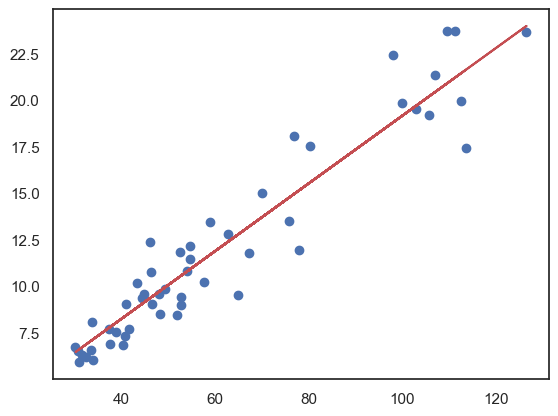

In [16]:
#plot the fitted line on the test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, "r")
plt.show()

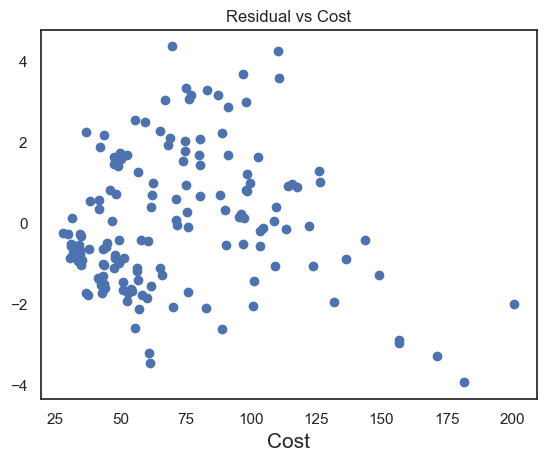

In [17]:
# CHECKLIST

# 1. NON-LINEARITY
# 2. NON-CONSTANT-VARIANCE
# 3. DEVIATIONS FROM NORMALITY
# 4. ERRORS NOT IID
# 5. OUTLIERS
# 6. MISSING PREDICTORS


#building predictors on training data
predictions_y = lr.predict(x_train_with_intercept)

#find residuals
r_i = (y_train - predictions_y)


#residual vs predictor in training data

plt.title("Residual vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(x_train, r_i)
plt.show()

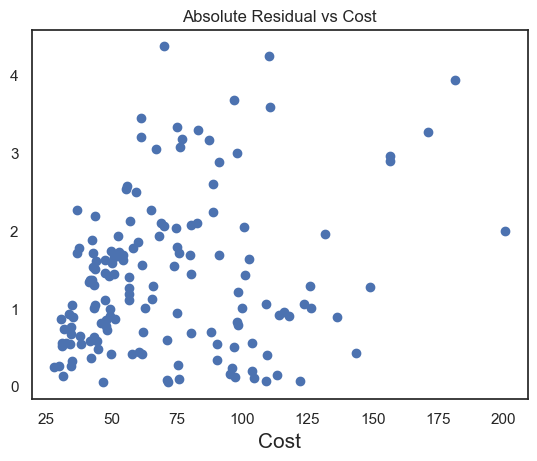

In [18]:
#Absolute residuals against predictors

abs_r_i = np.abs(y_train - predictions_y)
plt.title("Absolute Residual vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(x_train, abs_r_i)
plt.show()

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

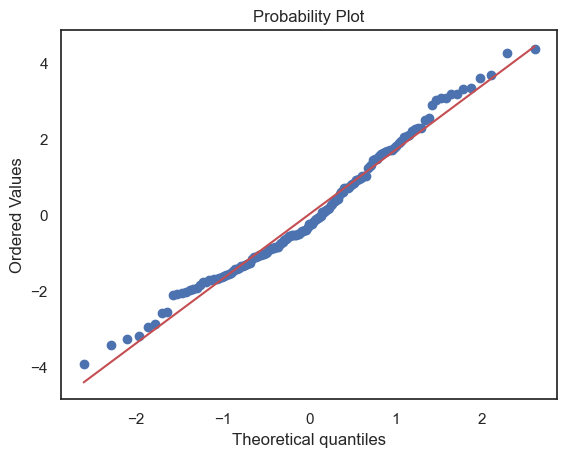

In [19]:
#Normality Plot

scipy.stats.probplot(r_i, plot=plt)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


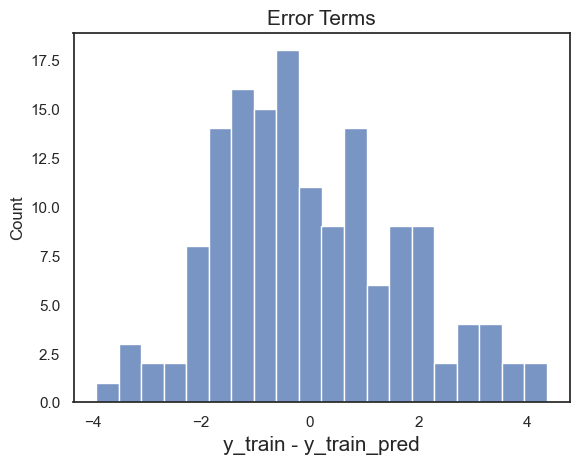

In [20]:
# Evaluate normality through a histograms of residuals

fig = plt.figure()
sns.histplot(r_i, bins=20)
plt.title("Error Terms", fontsize=15)
plt.xlabel("y_train - y_train_pred", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Residual Boxplot')

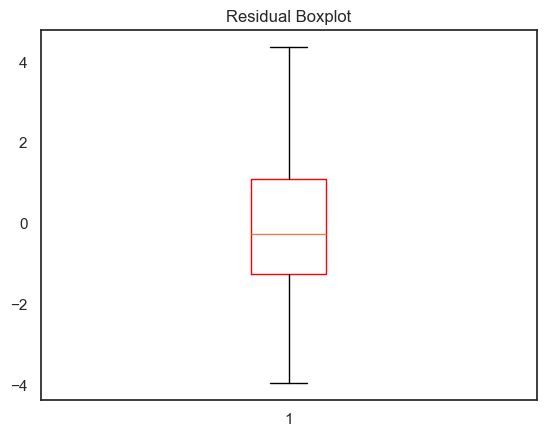

In [21]:
#Box plot for outliers

plt.boxplot(r_i, boxprops=dict(color="red"))
plt.title("Residual Boxplot")

In [22]:
#Diagnostics

test_residuals = (y_test - y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

51

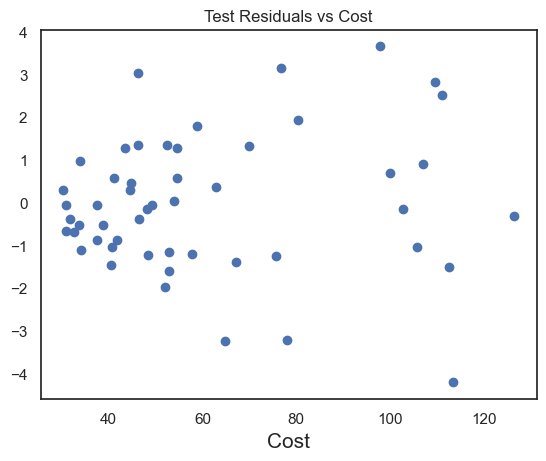

In [23]:
# Residual vs predictor in test set

plt.title("Test Residuals vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

## some evidence of non-constant variance were found

/var/folders/gj/6086x16d6y9_c9r_rtd3_q480000gn/T/ipykernel_58317/2521469687.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, bc_y, cmap='viridis')


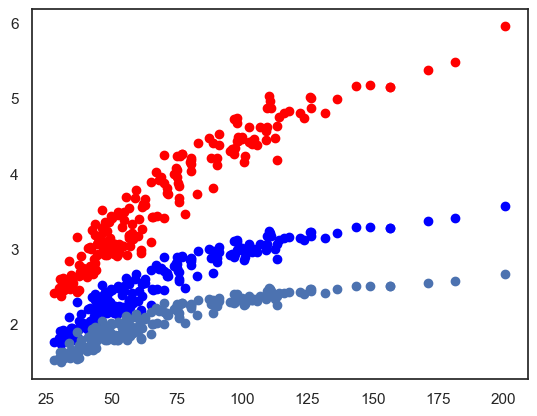

In [29]:
# To remove non-constant-variance - Heteroskedasticity to eliminate the non-constant-variance

#try sqrt

sqrt_y = np.sqrt(y)
plt.scatter(x, sqrt_y, color="red")

#try ln
ln_y = np.log(y)
plt.scatter(x, ln_y, color="blue")


#lets try a BC Transformation
bc_y = list(stats.boxcox(y))
bc_y = bc_y[0]
plt.scatter(x, bc_y, cmap='viridis')

In [28]:
#Run Regression on this test

#use the 

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, test_size=0.25, train_size=0.75, random_state=100)


#force intercept term

x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           9.72e-75
Time:                        12:19:49   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.000       1.864       2.071
Cost           0.0234      0.001     35.594      0.000       0.022       0.025
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.360
Skew:                           0.032   Prob(JB):                        0.507
Kurtosis:                       2.539   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Extract the B0 and B1

b0 = lr.params.iloc[0]
b1 = lr.params.iloc[1]

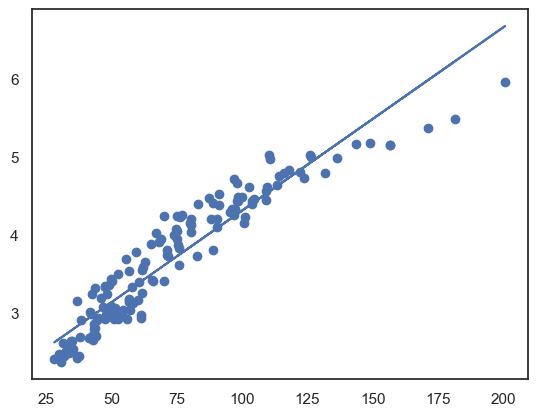

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1 * x_train)
plt.show()

In [32]:
#plot the fitted line on test data


x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

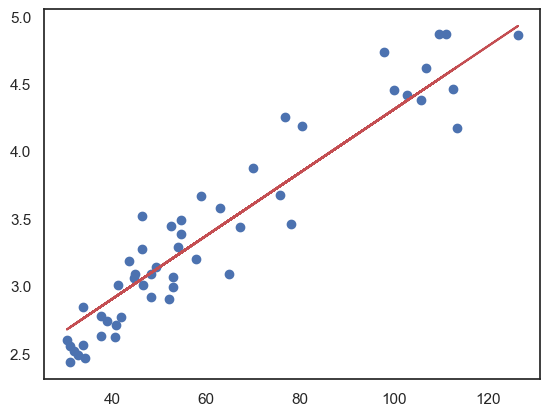

In [34]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, "r")
plt.show()

In [37]:
test_residuals = (y_test - y_test_fitted)
print(len(y_test))
print(len(y_test_fitted))
print(len(test_residuals))


51
51
51


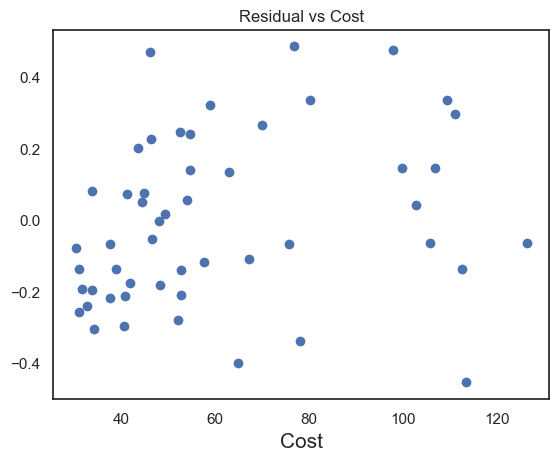

In [38]:
plt.title("Residual vs Cost")
plt.xlabel("Cost", fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()